<a href="https://colab.research.google.com/github/Shurbur/4210_Assignment5/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import metrics

X_training = pd.read_csv('/content/drive/MyDrive/Project 5_4210/clustering/training_data.csv', sep=',', header=None) #reading the data by using Pandas library

#assign your training data to X_training feature matrix

sil_score = []
max_sil = -999999
max_k = None



In [ ]:
#run kmeans testing different k values from 2 until 20 clusters
     #Use:  kmeans = KMeans(n_clusters=k, random_state=0)
     #      kmeans.fit(X_training)
for k in range(2, 21):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X_training)

  #for each k, calculate the silhouette_coefficient by using: silhouette_score(X_training, kmeans.labels_)
  #find which k maximizes the silhouette_coefficient
  temp_sil = silhouette_score(X_training, kmeans.labels_)
  sil_score.append(temp_sil)
  if temp_sil > max_sil:
    max_sil = temp_sil
    max_k = k 



Max k, silhouette:  10 , 0.191477028192782
K-Means Homogeneity Score = 0.872120356049812
Agglomerative Clustering Homogeneity Score = 0.8031062316259906


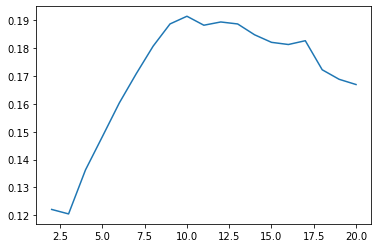

In [ ]:
#plot the value of the silhouette_coefficient for each k value of kmeans so that we can see the best k
plt.plot([x for x in range(2, 21)], sil_score)
print("Max k, silhouette: ", max_k, ",", max_sil)

#reading the validation data (clusters) by using Pandas library
X_testing = pd.read_csv('/content/drive/MyDrive/Project 5_4210/clustering/testing_data.csv', header=None) #reading the data by using Pandas library

#assign your data labels to vector labels (you might need to reshape the row vector to a column vector)
# do this: np.array(df.values).reshape(1,<number of samples>)[0]
labels = np.array(X_testing.values).reshape(1,-1)[0]

#Calculate and print the Homogeneity of this kmeans clustering
print("K-Means Homogeneity Score = " + metrics.homogeneity_score(labels, kmeans.labels_).__str__())

#rung agglomerative clustering now by using the best value o k calculated before by kmeans
#Do it:
agg = AgglomerativeClustering(n_clusters=max_k, linkage='ward')
agg.fit(X_training)

#Calculate and print the Homogeneity of this agglomerative clustering
print("Agglomerative Clustering Homogeneity Score = " + metrics.homogeneity_score(labels, agg.labels_).__str__())